In [68]:
from unicodedata import normalize
import pandas as pd
from nltk import tokenize
import nltk 

from nltk.corpus import gutenberg
import random
import re
import numpy as np
from numpy.random import normal, uniform

import matplotlib.mlab as mlab
from matplotlib import pyplot as  plt
import plotly.plotly as py
from time import time
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from unicodedata import normalize


from mpl_toolkits.mplot3d import proj3d

In [2]:
def reading_csv(dir):
    start = time()
    dataframe = pd.read_excel(dir)
    print('Save '+dir+' in dataframe %.2f seconds' % (time() - start))
    return dataframe

def filter_chat(dataframelist):
    df = dataframelist.loc[dataframelist['id sesion'] == dataframelist['id sesion']]
    df =  df.loc[(df['tipo participante'] == 'Usuario')]
    return df

In [3]:
dataframe = reading_csv('chatccb_full_mar_2016.xlsx')

Save chatccb_full_mar_2016.xlsx in dataframe 403.42 seconds


In [4]:
def filter_chat(dataframelist,human):
    df = dataframelist.loc[dataframelist['id sesion'] == dataframelist['id sesion']]
    df =  df.loc[(df['tipo participante'] == human)]
    return df

In [5]:
datafram_filtered_user = filter_chat(dataframe,'Usuario')

In [6]:
def filter_chat(dataframelist,human):
    df = dataframelist.loc[dataframelist['id sesion'] == dataframelist['id sesion']]
    df =  df.loc[(df['tipo participante'] == human)]
    return df

In [7]:
datafram_filtered_user.dropna(subset=['mensaje'], inplace=True)

## exclusionList

In [8]:
text_chat = datafram_filtered_user['mensaje']
exclusionList = ['#', '$', '%', '&', "'", "''", '(', ')', '+', '+03', '+3', ',4759', '-', '--', '-0', '-2', '-3',
 '-5', '-5207621','!', '..','202', '2022', '2029', '2032918', '2062263', '2094337', '20agencia.pdf', '20cambio',
 '20cancelaci', '20comercio', '20comercio.pdf', '20de', '20establecimiento', '20matr', '20natural.pdf', '20nombre',
 '20o', '20persona', '21', '211129248', '2123793', '22', '22/09/2015', '2200397', '22393', '2244235', '2250799',
 '22549', '2263132', '2282703', '22961', '23', '23.652.171', '2347648', '2353096', '2353097','2359075', '2390238',
 '2390241', '24', '24.023.207', '2482895', '25', '251300', '25130000', '2568995', '2587674', '2591963', '26', '2639795', '2649', '2649.', '26832', '27', '276832',
 '28', '283876', '28472260', '2847226_0', '3/10/2016', '3/31/2016', '30', '30/06/2015', '3004223412', '3013324988', '30160391304', '3024352',
 '3024775', '3030683', '3039974', '3053630', '3056150', '3076958', '3081935', '3086127', '31', '3105802608', '3107318', '3108503211',
 '3109888', '3114743', '3114811496', '3115790', '3115815', '3115843', '3118639580', '3124155', '313', '313,000.00', '3131385', '3133765350', '3134195', '3134559296', '3136737', '3141907',
 '3162453', '3163688', '3167172', '3168251', '3170554', '3183176', '3184899', '3185147173', '3188863-8', '3204320',
 '3204831', '3207866', '3211161', '3212181', '3224828', '3226242', '3227165', '3232034', '3233344', '3236679', '3236700', '3244053', '3245866', '3249948', '3259001', '3268768', '3274037', '3275453', '3282206', '3283359', '3294750', '3296930', '3302775', '3311009', '3317246', '3318900', '3330632', '3336354', '3343306', '3472729', '35221264',
 '3524', '354593906', '35477868', '36,000.00', '36.000', '376.000', '383-03-30', '3830330', '388873', '39782714', '4', '400.000',
 '4014380', '40800', '41781621', '417952007', '45.000.000', '4645', '4664', '466609731', '4669', '4711-1',
 '4719', '4719-1', '4729', '4763824', '48', '4800', '4818158', '4830496', '4853377', '4862621', '4878473',
 '4881425', '490', '4:00','4:15', '5', '50', '500.000.000', '5000000', '51', '51.850.777', '51646404', '517489942',
 '51789194', '51904300', '51985721-4', '51992345', '52.155.103', '52.209.511', '52.345.373', '52.781.989', '52063781', '52096707',
 '5209775', '52110978', '521109789', '52222224', '52345373', '524,000.00', '52454082-1', '524634664', '52484106', '524929938',
 '52520164', '52543993', '52554964', '52793221', '52837581', '52851147', '53032447', '53092314', '53118737', '54', '54636', '55','5714014380',
 '57508461', '58.000.000', '589004', '5908250', '5912324', '6', '60101100', '6129454/3202938557', '63,000.00',
 '65765842', '663704', '6:14:44', '6b', '7', "7.140'954.582", '70.000', '7010', '7020', '7140954582', '720', '729',
 '74.333.437', '77', '77.000', '78111800', '79.665.615-1', '79259415-2', '79287227-4', '793010665', '79325772', '79627325', '797318135', '797489492',
 '79790750', '797907501', '79948017', '799613273', '79979010', '8', '80', '80.000.000', '800.000',
 '800.073.493-2', '800.141.819-1', '800.164.764-4', '8000299833', '8000734932','800089364-0', '8000893640', '8000969698', '8001061667', '800110970',
 '800110970-3', '800120578-1', '8001414095', '800141819', '8001472025', '800149994', '8001706181', '800171845-1',
 '8001969551', '800231182-5', '800235665-9', '80051021', '80137455', '80184676', '801846769', '80225079', '8040165774', '8080009083', '808471', '8106283', '8299',
 '830.008.872-3', '830.017.569', '830.074.158-3', '830.093.422-4', '830.125575-1', '830.507.746-4', '830.515.294-0',
 '8300073799', '830017419-8', '8300175694', '8300184382', '830023797-1', '8300310471', '830044266-2', '830050476-7',
 '8300545036', '8300606609', '8300630871', '8300727609', '830074805', '830075303-1', '830083670-1', '830085241', '830089010-8',
 '830089318-', '8301144985', '8301173601', '8301195979', '8301199165', '8301255751', '8301288545', '830129050-5', '830143689', '830145128-8', '8305068482', '830515061-1', '860.002.185-3', '860.053.976-0', '860.509.639-2', '8600072141',
 '8600073229', '8600141355', '8600272297', '8600370738', '860037293-1', '8600490421', '860050420-4', '860144566', '8604029341', '8605066881', '860509639', '860510003', '860510030',
 '8605123303', '8605154029', '860517566-7', '8605289588', '860529319-6', '860530482-0', '860600006-9', '8606000069',
 '87000', '89,000.00', '89.000.00', '890203194-1', '8902039449', '890300234', '8903010714', '8:36:32', '8am', '9', '9-22803', '9-23089', '9.700', '9.700.oo', '90',
 '900', '900-532.511-1', '900.064.854-2', '900.100.046-2', '900.156.700-2', '900.213.063-3', '900.245.670-1', '900.270.439-1', '900.355.646-6', '900.367.546-1', '900.376.042-8', '900.422.080-5', '900.480.924-3', '900.571.9191-7',
 '900.645.471', '900.667.024-4', '900.747.634-0', '900.845.285-3', '900.912.867-7', '900.922.501-1', '9000183356',
 '900020031', '900053354-4', '9000533711', '9000648542', '9000674930', '9000710403', '9000964199', '9001216811', '9001306968', '900143108-5',
 '900144233', '9001442332', '900144754-8', '900164444-5', '9001668794',
 '900171498', '9001923335', '900200194-3', '9002066705', '900212129-6', '900220174-1', '900228646-2', '900235445-8', '9002354458',
 '9002471907', '9002523182', '9002617681', '9002657959', '9002724193', '900276527-9','9002765279', '900283039-5', '900292275-5', '900296079-6', '9002960796', '9002965795-9',
 '900296929', '900307641', '900325596-8', '900331138-2', '900339586-5', '9003401398', '9003454030', '9003495567', '900363888', '9003638885',
 '9003819668', '900383424', '900388924', '9004089753', '900424856-2', '900429923', '900435450-3', '900440851-3', '900456613',
 '9004566137', '900469443-8', '9004723502', '900472551', '900473073', '900482978-1', '900496013-9', '9005006769', '900511868-3', '9005252542', '900534407-0', '900536172-4', '900536724', '9005384964', '900544356-6', '900546430', '9005464302', '900549765', '900550778', '9005507785', '900552595-3', '9005617618', '900575653-1', '9005819136', '900587466.2', '900587504-4',
 '900595811-4.', '900598552', '9005985525', '9006069951', '9006085505', '900615053-5', '9006155091', '9006303969', '9006349887', '900636629-7', '9006395966', '9006398344', '900641182-4', '9006416756', '900644411-2', '900649101-7', '900654487-4', '9006587766', '9006669995', '9006670244', '9006705751', '9006732782', '9006825792', '9006903094', '900692118-3', '9007035257', '900705747', '900719260-0', '900719411', '9007210625', '9007244961',
 '9007267625', '900729853-0', '900730241-5', '900742043-5', '900743069-0', '9007430690', '900744235', '900749623-9', '9007535243', '9007577563', '9007579212', '9007623055', '900769930', '9007699303', '900779136', '900779136-1', '900787011-2', '9007877887', '900792675', '900792859-1', '900796758', '900797905', '900801190', '9008011903', '9008014241', '9008095554', '900810833-9', '900813237', '9008202404', '9008209393',
 '900823653-6', '9008236536', '9008274158', '900829506', '9008295069', '900832012-3', '9008320621', '9008375301', '9008421156', '9008432546', '9008673057', '9008687276', '900870917', '9008709175', '900876963-1', '900877274-1', '900891853-2', '900896033-2', '9009128677', '900913496-2', '900920473-2', '900931477-9', '9009320573',
 '919-7', '95', '963945327', '9700', ':30', ';', '=',  '..gracias', '..hice', '..ps', '.33', '.e',
 '.entonces', '.estoy', '.genere', '.gracias', '.muy', '.ç', '/', '0', '0,00','0.00', '0.7', '00', '000', '000001600089439', '000001600118469', '000009000533711', '000009005958114', '00019550', '0002321315', 
'0002553052', '0002662182', '0002927124', '0003016469', '0003078101', '0003078512', '0003085701', '0003092258', '0003135873', '0003150439', '0003163688', '0003164010', '0003179945', '0003196390', '0003203981', '0003207866', '0003237083', '0003244124', '0003249752', '0003279594', '0003319235', '0010106175', '00177402',
 '00203828', '003052208', '003095011', '00396272', '00416479', '00625404', '00711415', '00743861', '00761867', '00781808', '00859902', '00864357', '00917814', '01031947', '01049447', '01084537', '01097155', '01135195', '01229546', '01269551', '01304702', '01356227', '01356489', '01392562', '01404688', '01431960', '01439317', '01527862', '01534835', '01545118', '01562655', '01636772', '01761825', '01804863', '01851006', '01892885', '01918482', '01924086', '01963974', '01988781', '02',
 '02000227', '02005954', '02015551', '02018455', '02039051', '02058176', '02077893', '02093972', '02103287', '02116348', '02118901', '02120499', '02138062', '02147098', '02154840', '02173963', '0218',
 '02222513', '02254286', '02264145', '02268279', '02297996', '02301835', '02307216', '02354793', '02367601', '02374241', '02379812', '02399829', '02407124', '02407128', '02425229', '02425711', '02439169', '02441925', '02443417', '02448655', '02452689', '02458033', '02462674', '02467280', '02472921', '02473172',
 '02473180', '02517308', '02518042', '02521354', '02527534', '02546313', '02546886', '02550008', '02550763', '02559018', '02562329', '02564773', '02567339', '02570032', '02575913', '02579879', '02589335', '02591142', '02606211', '02616250', '02625424', '02627266', '02628362', '02633382', '02638738', '02658210', '02662182', '02c200224123',
 '03', '0361398', '04', '0519172', '06:06', '07', '0736273', '0736275', '083', '08:56',
 '1', '1,509,000.00', '1.', '1.-', '1.000.000', '1.070.952.898', '1.250.000.000', '1.335.000', '1.748.739.692', '1/1/0001', '10', '100', '100.000.000', '10108380',
 '10114382', '10116739', '10116982', '10118021', '10118051', '10119993', '1012363934', '10124032', '10128717', '10129149', '10130083', '10131244', '10132338', '1014',
 '1019069318', '1019081644', '1020725368', '1022327363', '1023863989', '1024534762', '1026292191', '103241260141', '1032423642', '107', '1094897872', '10:30',  '11', '110.000', '1121890101-3', '11226652-3', '1146243',
 '116.450.000', '11:26', '12', '122.422-t', '12749464', '128000', '12:00', '132', '14', '140', '1429', '143620-0', '1472197', '1497121',
 '15', "15'000.000", '152', '1545118', '1552691', '1585241', '15:37:42', '1600053314','16000553314', '1600072982', '1600081211', '1600084878', '1600085050-51-49-52', '1600086035', '1600089873', '1600096063', '1600097469', '1600100163', '1600100249', '1600102803','*ciudad', '*sujeto', '..acabo', '..mil', '.hay', '.ja', '.parallevar', '.por','.y', '//asistenciavirtual.ccb.org.co/portal/default.aspx',
 '//chat.millenium.com.co:8080/webchatccb/userinfo.jsp', '//linea.ccb.org.co', '//linea.ccb.org.co/certificadoselectronicos/', '//linea.ccb.org.co/clavevirtual/portalconsulta/busqueda.aspx',
 '//linea.ccb.org.co/rup/forms/selecciontramiteinscripcion.aspx', '//linea.ccb.org.co/tiendaconsultas/tienda/busqueda.aspx',
 '//linea.ccb.org.co/tiendamatricula/defaultservicios/default.aspx', '//linea.ccb.org.co/tiendamatricula/tienda/busqueda.aspx', '//rntbogota.confecamaras.co/registrar-establecimiento', '//sedevirtual.ccb.org.co/sedeelectronica/tramites/tramite.do', '//www.ccb.org.co/content/download/4738/59926/file/solicitud',
 '//www.ccb.org.co/content/download/4741/59938/file/solicitud', '//www.ccb.org.co/content/download/4744/59950/file/solicitud',
 '/03/2016', '10a', '1600104515', '1600109551', '16001095510', '1600128324.', '1600130980', '160rqykk', '1648','16g0wwfy', '17', '17101160', '171413040', '1780945',
 '18', '182', '187107144', '19', '19.141.583', '19069245', '1907563', '19137864', '19358468', '19423422', '194630531', '19480490',
 '1964586','1:30', '2', '2,3', '2.', '2.-', '2.000', '2.015', '20', '20.000.000', '200', '2000', '2001', '2006', '2009', '2010', '2010.','2012',
 '2013', '2014', '2015', '2016', '2016.', '2016/03/17', '2016003', '2016003915', '2016005473', '2016005726', '20160219-0073', '20160308556','20160391214', '20167719', '201699000644', '29', '2a', '2b',
 '3', '3.', '3830330.', '4smdlv', '5a', '6a', '9004576909.', '9xmeycgwv4z', '_', '``', 'a.', 'aa', 'aaa',
 'aaaa', 'aademas', 'aah', 'aba', 'abajo', 'abandono', 'abansar', 'abc', 'abierta', 'abiertas', '000001600027058','abierto','sas',
'abre','abri','abriendo' ,'abril', 'abrimos','abrir','abrire','abrirlo' ,'aca','acaba','acaban','acabe','acabo','acabé',
 'accb', 'accer' ,'accesorios','accion','acarrea','acatas','accedieron','accedí','accesar',
                     
'accionista','acción','abministracion','reales','francisco','reactivarla','fu','fuera..','fuerza','full','funcion',
'reactivar','funcionado','funcionamiento','funcionan','funcionando','reactivacion','funcionara','funcionaria','re',
'funcionarios','funcione','fotma','realiace','fortadpays','realiz','fomulario','fonatanr','fondo','realmente',
'realizra','ingresarlos','iovanna','ips','ira','irian','irlo','irntentar','irrevocable','isabel','ismenia','itversion6.com',
'ior','izquierda','tiempos','jairo..','jap454','jaramillo','tesoreria','jcgg79','jd','terrible','jefferson',
'jheferson..','j.cifuentes','iongreso','io','invitado','integrales','intenet','tm','cámara',
 'generica','internacional','internety','internt','internte','interés','intetar','intyernet','invalido',
'time','investigamos','interior','termnia','jm','jmm','joaquin','johanna','joralexis','jorge','joselitocarnaval13',
'jpsingenieria.com','jramirez','jrs5143','terminos','interet','interesado','intenté','inscriben','inscribieron',
'inscribirá','tipo=zlkvqxszgjy=','tipo=autgjcydrv8=','academias','académica','aceder','aceote','aceptables','aceptaciòn',
'aceptaron','aceptado','ç',':','acogerse','acogio','acogió',
'acojì','acreedor','solicitud','2015','comercio'
                 

 ]
text_chat_token = text_chat.str.cat(sep=' ').lower()

In [9]:
text_chat_token = re.sub(pattern=r"\d", repl=r"", string=text_chat_token)
len(text_chat_token)

21631315

In [10]:
text_chat_token = re.sub(pattern=r"-", repl=r"", string=text_chat_token)
len(text_chat_token)

21612039

In [11]:
text_chat_token = re.sub(pattern=r"=", repl=r"", string=text_chat_token)
len(text_chat_token)

21611574

In [12]:
text_chat_token = re.sub(pattern=r"%", repl=r"", string=text_chat_token)
len(text_chat_token)

21609792

In [13]:
text_chat_token = re.sub(pattern=r":", repl=r"", string=text_chat_token)
len(text_chat_token)

21596041

In [14]:
text_chat_token = re.sub(pattern=r"@", repl=r"", string=text_chat_token)
len(text_chat_token)

21590665

In [15]:
text_chat_token = re.sub(pattern=r"//", repl=r"", string=text_chat_token)
text_chat_token = re.sub(pattern=r"", repl=r"", string=text_chat_token)
len(text_chat_token)

21587729

In [16]:
text_chat_token = re.sub(pattern=r"/", repl=r"", string=text_chat_token)
text_chat_token = re.sub(pattern=r"////", repl=r"", string=text_chat_token)
len(text_chat_token)

21584600

In [17]:
text_chat_token = re.sub(pattern=r"!", repl=r"", string=text_chat_token)
len(text_chat_token)
text_chat_token = re.sub(pattern=r",", repl=r"", string=text_chat_token)
len(text_chat_token)
text_chat_token = re.sub(pattern=r"ok", repl=r"", string=text_chat_token)
len(text_chat_token)


21458772

In [18]:
#text_chat_token = re.sub(pattern=r'[^\w]', repl='', string=text_chat_token)
text_chat_token = text_chat_token.replace("$", "")
text_chat_token = text_chat_token.replace("?", "")
text_chat_token = text_chat_token.replace(".", "")
text_chat_token = text_chat_token.replace("'","")
len(text_chat_token)
text_chat_token = re.sub(pattern=r"¿", repl=r"", string=text_chat_token)
len(text_chat_token)

21242743

In [19]:
most_token_chat = tokenize.wordpunct_tokenize(text_chat_token)

In [20]:
len(most_token_chat)

3695226

## most_token_chat

In [21]:
most_token_chat = [normalize('NFKD', word.lower()).encode('ascii', 'ignore').decode('utf-8') 
                 for word in most_token_chat]

In [22]:
clean_chat = most_token_chat[:67676]
clean_tokens =  clean_chat[:]
stop_words = stopwords.words('spanish') + ['buenas','gracias','buena','tarde','luego',
                                          'señora','quiero','saber','sra','quisiera','sr','mil',
                                          'tardes','buenos','hola','gmail','com','ok',
                                       'pregunta','decir','entiendo',
                                           'mismo','bueno','deseo','ustede','ustedes','usted',
                                           'Diana','deja'
                                           ,'voy','debe','debo','hotmail','osea','nuevamente','cambio',
                                           'siguiente','debo'
                                           
                                           ,'Alejandro','alejandro','Carolina','carolina','Karen', 'Francy'
                                           ,'francy', 'natalia',"rincon", "joana", "adriana", "david", "chavez", "pachon", "camila",
                                           "leidy", "leydi", "diaz", "andres", "jimenez", "olga", "luisa", "marcela", "yeraldin", "yang", "moreno",
                                           "adied", "carlos", "maria", "tatiana", "hiliany", "fernanda", "castiblanco", "viviana", "francy", "cortes",
                                           "fracica", "aguirre", "guzman", "nathaly", "camilo", "buitrago", "diana", "karen", "natali"
                                           "velasquez", "didier", "zapata", "gomez", "luz", "yhanira", "andrea", "barbosa", "yeicy", "luis",
                                            "stefanny", "velasquez", "didier", "zapata", "gomez", "luz", "yhanira", "andrea", "barbosa", "yeicy",
                                           "luis", "alejandro", "carolina", "sandra", "yeny", "torres", "nataly", "vivas", "mario", "jheferson",
                                           "mendoza",                   'pagina','aun','perdon','hora','tener','pena','cada','ser',
                                           'correo',   'cada','tener','poder','veo','consulta','medio'
                                           ,'inquietud', 'puedes','ayudar','realizar',
                                           'llego','mañana','hacerlo','mucha','permite','dicen','correcto'
                                           ,'ano','puedo','podria','muchas','encuentro','ccb','org','senor',
                                           'senora','senorita'                                 ,'colaborar','ver','va','tenia','ver',
                                           'vale','estan','opcion','algun','error','problema','amable',
                                           'ayer','indicar','ir','imprimir','copia','realice','cambiar','ingresar'
                                           ,'persona','la','?',',','.','Hola','52082905', 'termina', 'cero',
                                           '520829050', 'ahh', 'Gracias', 'Tenemos','ninguna','Que', 'Si','alli',
                                           'srta','q','DE','LA','...','Y','EL','QUE','NO','@','No','ME','EN',
                                           'Buenas','haga','La','Ah','mano','En','PERFECTO','si','dias'
                                           ,'camara', 'comercio','buen', 'dia','fj','ana', 'santana',
                                           'alfredo_c_arenashotmailcom','caterine','s','http', '//'
                                           , 'lineaccborgco','///','/'
                                          ]
clean_tokens = list(filter(lambda word: word not in stop_words, clean_tokens))
# for token in clean_chat: 
#     if token in stop_words:
#          clean_tokens.remove(token)

In [23]:
from nltk import ngrams

In [24]:
unigrams = ngrams(clean_tokens, 1)
freq_uni = nltk.FreqDist(unigrams).most_common()
unigrams_dataframe = pd.DataFrame(freq_uni,columns=['unigramas','conteo'])
#writer_unigrams = pd.ExcelWriter('ngramas.xlsx')


In [25]:
#unigrams

In [35]:
bigrams = ngrams(clean_tokens, 2)
freq_bi = nltk.FreqDist(bigrams).most_common()
bigrams_dataframe = pd.DataFrame(freq_bi,columns=['bigramas','conteo'])
#writer_bigrams = pd.ExcelWriter('ngramas.xlsx')
bigrams_dataframe
trigramas_dataframe
#unigrams_dataframe

,bigramas,conteo
0,"(renovacion, matricula, mercantil)",67
1,"(renovar, matricula, mercantil)",37
2,"(renovacion, registro, mercantil)",16
3,"(pago, renovacion, matricula)",15
4,"(numero, matricula, mercantil)",14
5,"(matricula, mercantil, empresa)",14
6,"(cancelar, matricula, mercantil)",12
7,"(hacer, renovacion, matricula)",10
8,"(tratando, renovar, matricula)",10
9,"(pagar, renovacion, matricula)",9


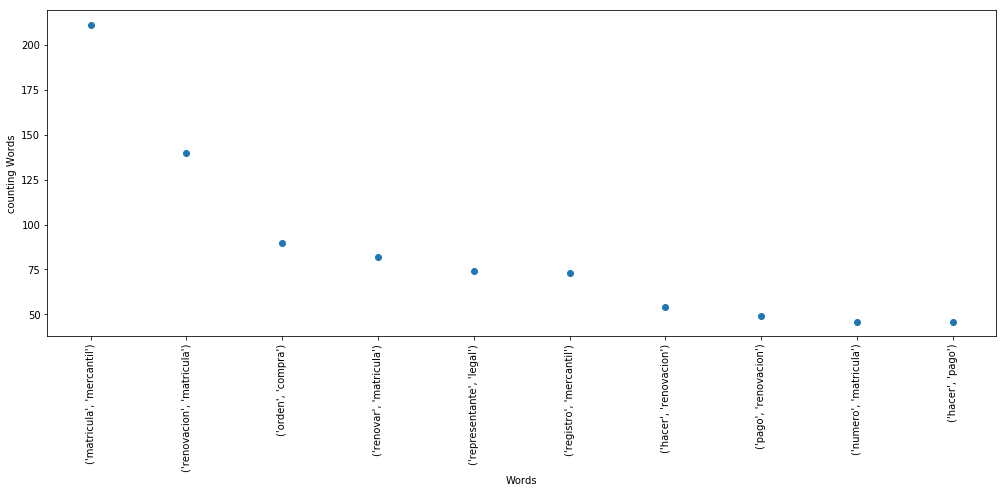

In [112]:
most_common_word_user = freq_bi[:10]

# sort in-place from highest to lowest
#most_common_word_user.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*most_common_word_user))[0]
score = list(zip(*most_common_word_user))[1]
x_pos = np.arange(len(people)) 

plt.figure(figsize=(17,6))
#plt.bar(x_pos, score,align='center')
plt.scatter(x_pos,score)
plt.xticks(x_pos, people, rotation=90)
#plt.yticks(x_pos,max(people))#min(x), max(x)+1, 1.0)
plt.ylabel('counting Words')
plt.xlabel('Words' )
plt.show()


In [27]:
trigrams = ngrams(clean_tokens, 3)
freq_tri = nltk.FreqDist(trigrams).most_common()
trigramas_dataframe = pd.DataFrame(freq_tri,columns=['bigramas','conteo'])

In [28]:
trig_1 = trigramas_dataframe['bigramas'].copy()

In [29]:
trig_t = trig_1.values.tolist()
conteo = conteo.values.tolist()


In [65]:
 conteo[:10]

[67, 37, 16, 15, 14, 14, 12, 10, 10, 9]

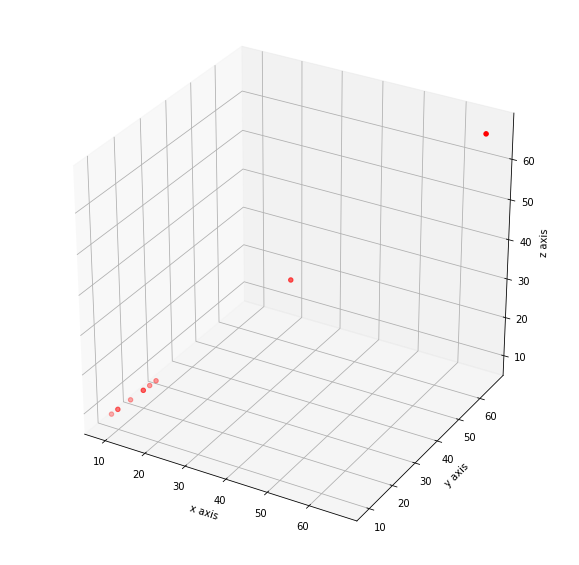

In [106]:
from mpl_toolkits.mplot3d  import axes3d

fig = plt.figure(figsize=(10,10))
#plt.figure(figsize=(17,6))
ax = fig.add_subplot(111,projection='3d')

x = conteo[:10]
y = conteo[:10]
z = conteo[:10]

#ax plt.get_xmajorticklabels
ax.
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

plt.show()


## Export to Excel Ngrams

In [93]:
#trigrams = list(trigrams)
#trigrams = pd.DataFrame(trigrams,columns=['bigramas','conteo'])
#writer_trigrams = pd.ExcelWriter('ngramas.xlsx')
#unigrams.to_excel(writer_trigrams,sheet_name ='sheet1',index=False)
#bigrams.to_excel(writer_trigrams,sheet_name ='sheet2',index=False)
#trigrams.to_excel(writer_trigrams,sheet_name ='sheet3',index=False)

#writer_trigrams.save()
#writer.close()
freq_uni_30 = []
for word in freq_uni[:30]:
    freq_uni_30 = word

In [95]:
freq_uni[:30]

[(('matricula',), 537),
 (('renovacion',), 455),
 (('hacer',), 451),
 (('pago',), 376),
 (('mercantil',), 303),
 (('favor',), 277),
 (('empresa',), 277),
 (('clave',), 230),
 (('puede',), 225),
 (('renovar',), 223),
 (('numero',), 219),
 (('nit',), 197),
 (('orden',), 190),
 (('dice',), 182),
 (('pagar',), 179),
 (('tramite',), 177),
 (('registro',), 176),
 (('necesito',), 158),
 (('informacion',), 151),
 (('establecimiento',), 143),
 (('sas',), 135),
 (('aparece',), 124),
 (('proceso',), 123),
 (('hago',), 122),
 (('solo',), 121),
 (('compra',), 120),
 (('internet',), 116),
 (('nombre',), 105),
 (('virtual',), 104),
 (('formulario',), 104)]

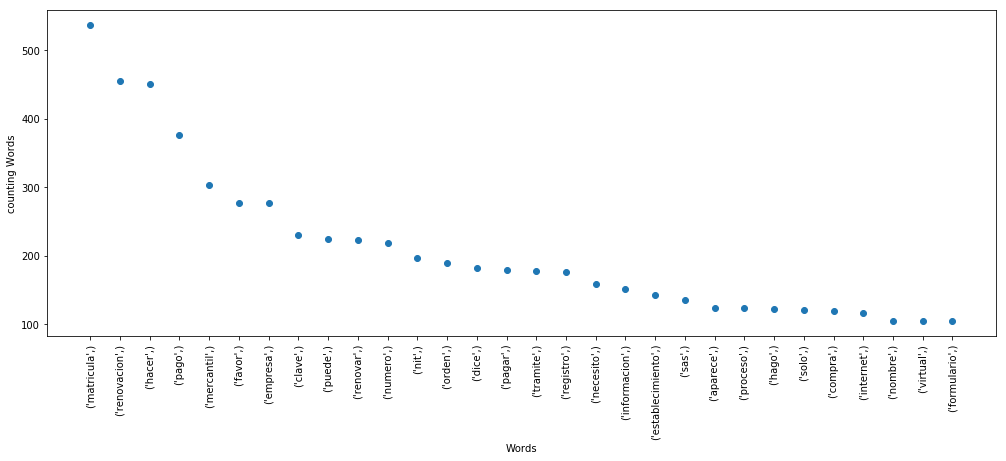

In [96]:
freq = nltk.FreqDist(clean_tokens).most_common()
most_common_word_user = freq_uni[:30]

# sort in-place from highest to lowest
#most_common_word_user.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*most_common_word_user))[0]
score = list(zip(*most_common_word_user))[1]
x_pos = np.arange(len(people)) 

plt.figure(figsize=(17,6))
#plt.bar(x_pos, score,align='center')
plt.scatter(x_pos,score)
plt.xticks(x_pos, people, rotation=90) 
plt.ylabel('counting Words')
plt.xlabel('Words' )
plt.savefig("unigrams.jpg", bbox_inches='tight')
plt.show()

In [52]:
# bigrams = ngrams(clean_tokens, 2)
# trigrams = ngrams(laclean_tokensbels, 3) 
# nltk.FreqDist(trigrams).most_common()
# most_common_word_user = freq.most_common(100)[50:]

In [43]:
trigrams= list(trigrams) 
import csv

with open('trigramas.csv','w') as myfile:
    wr = csv.writer(myfile, lineterminator='\n')
    wr.writerows(trigrams)

In [44]:
most_token_chat = tokenize.word_tokenize(text_chat_token)
clean_chat = most_token_chat[:67676]
clean_tokens =  clean_chat[:]
stop_words = stopwords.words('spanish') + ['buenas','gracias','buena','tarde','luego',
                                          'señora','quiero','saber','sra','quisiera','sr','mil',
                                          'tardes','buenos','hola','gmail','com','ok',
                                       'pregunta','decir','entiendo',
                                           'mismo','bueno','deseo','ustede','ustedes','usted','Diana','deja'
                                           ,'voy','debe','debo','hotmail','osea','nuevamente','cambio',
                                           'siguiente','debo','Alejandro','alejandro','Carolina','carolina',
                                           'pagina','aun','perdon','hora','tener','pena','cada','ser',
                                           'correo','Karen','cada','tener','poder','veo','consulta','medio'
                                           ,'inquietud','Francy','francy','puedes','ayudar','realizar',
                                           'llego','mañana','hacerlo','mucha','permite','dicen','correcto'
                                           ,'ano','puedo','podria','muchas','encuentro','ccb','org','senor',
                                           'senora','senorita','natalia','colaborar','ver','va','tenia','ver',
                                           'vale','estan','opcion','algun','error','problema','amable',
                                           'ayer','indicar','ir','imprimir','copia','realice','cambiar','ingresar'
                                           ,'persona','la','?',',','.','Hola','52082905', 'termina', 'cero',
                                           '520829050', 'ahh', 'Gracias', 'Tenemos','ninguna','Que', 'Si','alli',
                                           'srta','q','DE','LA','...','Y','EL','QUE','NO','@','No','ME','EN',
                                           'Buenas','haga','La','Ah','mano','En','PERFECTO','si','dias'
                                          ]
for token in clean_chat: 
    if token in stop_words:
         clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
freq.plot(30, cumulative=False)

KeyboardInterrupt: 

In [ ]:
from nltk import ngrams
bigrams = ngrams(clean_tokens, 2)
trigrams = ngrams(clean_tokens, 3)
nltk.FreqDist(trigrams).most_common()
freq.most_common(20)[5:]

In [ ]:
clean_tok = pd.DataFrame(clean_tokens,columns=['words'])
#clean_tok['words'].value_counts()

In [ ]:
clean_tok['words'].dropna(inplace=True)
clean_tok['words'].value_counts()
dataframe_size = clean_tok.groupby(clean_tok['words']).size()

### porcentage por palabra

In [ ]:
words_percentage = dataframe_size.div(sum(dataframe_size.values)/100).tolist()
palabras = dataframe_size.keys().tolist() 

In [ ]:
dataframe_percentage = pd.DataFrame(palabras,columns=['words'])
dataframe_percentage.insert(1,'percentage',words_percentage)
dataframe_percentage_sort = dataframe_percentage.sort_values(by=['percentage'],ascending=False).copy()

In [ ]:
words = dataframe_percentage_sort['percentage'].tolist() 
palabras_des = dataframe_percentage_sort['words'].tolist()

In [ ]:
for wo in words:
    print(wo)

In [ ]:
words = dataframe_percentage_sort['percentage'].tolist() 
palabras_des = dataframe_percentage_sort['words'].tolist()
words = words[:30]
palabras_des = palabras_des[:30]

In [ ]:
plt.figure(figsize=(17,10))

bins = np.linspace(0, 400, 20)

title_graph = 'Total_words',len(words)

plt.bar(np.arange(len(words)), words)
plt.ylabel("Palabras")#
plt.xlabel("Palabras")
plt.xticks(np.arange(len(words)), palabras_des, rotation=90)
plt.title(title_graph)
plt.savefig("Percentage_Label.jpg", bbox_inches='tight')
plt.show()
plt.savefig("Percentage_Label.png")

### ngramas

In [ ]:
labels = dataframe_size.keys().tolist()

### bigrams

### triagrams

In [ ]:
bigrams = ngrams(clean_chat, 2)
bigrams = nltk.FreqDist(bigrams).most_common()
for bi in bigrams:
    print(bi)

trigrams = ngrams(clean_chat, 3)
trigrams = nltk.FreqDist(trigrams).most_common()
for tri in trigrams:
    print(tri)

In [40]:
bigrams = ngrams(labels, 2)
trigrams = ngrams(labels, 3)
nltk.FreqDist(trigrams).most_common()
most_common_word_user = freq.most_common(100)[50:]

title_graph = 'Total_words',len(labels)
# sort in-place from highest to lowest
#most_common_word_user.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
people = list(zip(*most_common_word_user))[0]
score = list(zip(*most_common_word_user))[1]
x_pos = np.arange(len(people)) 

plt.figure(figsize=(17,6))
plt.bar(x_pos, score,align='center')
plt.xticks(x_pos, people, rotation=90) 
plt.ylabel('Numer_Words')
plt.xlabel('Words' )
plt.title(title_graph)
plt.show()

NameError: name 'labels' is not defined

In [ ]:
#only_one_chat= ' '.join(chat_user['mensaje'].get_values())
def filter_chat(dataframelist,human):
    df = dataframelist.loc[dataframelist['id sesion'] == dataframelist['id sesion']]
    df =  df.loc[(df['tipo participante'] == human)]
    return df

datafram_filtered_user = filter_chat(dataframe,'Usuario')
datafram_filtered_agent = filter_chat(dataframe,'Agente')
print("user-> ",len(datafram_filtered_user))
print("\nagent-> ",len(datafram_filtered_agent))
datafram_filtered_agent.dropna(subset=['mensaje'], inplace=True)
datafram_filtered_user.dropna(subset=['mensaje'], inplace=True)

## promedio words user/agent

In [ ]:
## agent
datafram_filtered_agent['cant_tokens'] = datafram_filtered_agent['mensaje'].apply(lambda token:len(tokenize.word_tokenize(str(token))))
promedio_words_agent = datafram_filtered_agent.groupby('id sesion').apply(lambda row: row['cant_tokens'].sum()/len(row)).values.tolist()

In [ ]:
## user
datafram_filtered_user = datafram_filtered_user['mensaje'].apply(lambda token:tokenize.word_tokenize(str(token)))
promedio_words_user = datafram_filtered_user.groupby('id sesion').apply(lambda row: row['cant_tokens'].sum()/len(row)).values.tolist()

## graph_promedio_words_agent & user

In [ ]:
# size_graph
plt.figure(figsize=(10,10))

bins = np.linspace(0, 45, 100)

plt.hist(promedio_words_agent, bins, normed=False, histtype='stepfilled', color="b", alpha=0.5, label="Agent")
plt.hist(promedio_words_user, bins, normed=False, histtype='stepfilled', color="r",  alpha=0.5,label="User")

plt.title("Promedio_Word")
plt.ylabel("Number_Chats")#
plt.xlabel("Number_Words")
plt.legend()
plt.savefig("Promedio_Word.jpg", bbox_inches='tight')
plt.show()

## promedio letter user/agent

In [ ]:
## agent
datafram_filtered_agent['cant_letter'] = datafram_filtered_agent['mensaje'].apply(lambda token:len(re.sub('\s','',re.sub('\s','',token))))
promedio_letter_agent = datafram_filtered_agent.groupby('id sesion').apply(lambda row: row['cant_letter'].sum()/len(row)).values.tolist()

## user
datafram_filtered_user['cant_letter'] = datafram_filtered_user['mensaje'].apply(lambda token:len(re.sub('\s','',re.sub('\s','',token))))
promedio_letter_user = datafram_filtered_user.groupby('id sesion').apply(lambda row: row['cant_letter'].sum()/len(row)).values.tolist()

In [ ]:
print('agent-> ',len(datafram_filtered_agent['cant_letter']))
print('\nuser-> ',len(datafram_filtered_user['cant_letter']))

## graph_promedio_letter_agent & user

In [ ]:
# size_graph
plt.figure(figsize=(10,10))

bins = np.linspace(0, 300, 100)

plt.hist(promedio_letter_agent, bins, normed=False, histtype='stepfilled', color="b", alpha=0.5, label="Agent")
plt.hist(promedio_letter_user, bins, normed=False, histtype='stepfilled', color="r",  alpha=0.5, label="User")

plt.title("Promedio_letter")
plt.ylabel("Number_Chats")#
plt.xlabel("Number_letter")
plt.legend()
plt.savefig("Promedio_letter.jpg", bbox_inches='tight')
plt.show()

## cloud words most use user/agent

In [ ]:
#getthis mostcomon_histograma 
## agent
most_letter_use_agent = datafram_filtered_agent['mensaje'].str.cat(sep=' ')

## user
most_letter_use_user = datafram_filtered_user['mensaje'].str.cat(sep=' ')

## graph_cloud_letter_agent & user

In [ ]:
wordcloud = WordCloud(max_words=100, stopwords=stopwords.words('spanish'), background_color='white' ).generate(most_letter_use_agent)
#wordcloud = wordcloud(max_words=100, stopwords=stopwords.words('spanish'), background_color='white' ).generate(most_letter_use_user)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("cloud_Word_agent.jpg", bbox_inches='tight')
plt.show()

In [ ]:
stop_words = stopwords.words('spanish') + ['buenas','gracias','buena','tarde','luego','necesito',
                                          'señora','quiero','saber','sra','quisiera','sr','mil',
                                          'tardes','buenos','hola','gmail','com','dias','ok',
                                           'camara', 'comercio','Cámara','Bogotá',
                                           'puede','favor','buen','día', 'dia',
                                          'hago','dias','hacer','si','hace','despues',
                                           'ayuda','hoy','ahi','tambíen','tambien'
                                           ,'ma','pue','señorita','señor','internet'
                                          ,'parte','nombre','posible','entonce','hice','duda',
                                          'momento','claro','dice','perfecto','asi','bogota'
                                          ,'paso','proceso','dias','do','aparece','pues','sale'
                                           ,'co','mas','indica','bien','verdad','año'
                                           ,'caso','pregunta','pasa','días','ahora','listo','solo'
                                           ,'entonces','mira','ingreso','pregunta','decir','entiendo',
                                           'mismo','bueno','deseo','ustede','ustedes','usted','Diana','deja'
                                           ,'voy','debe','debo','hotmail','osea','nuevamente','cambio',
                                           'siguiente','debo','Alejandro','alejandro','Carolina','carolina',
                                           'pagina','aun','perdon','hora','tener','pena','cada','ser',
                                           'correo','Karen','cada','tener','poder','veo','consulta','medio'
                                           ,'inquietud','Francy','francy','puedes','ayudar','realizar',
                                           'llego','mañana','hacerlo','mucha','permite','dicen','correcto'
                                           ,'ano','puedo','podria','muchas','encuentro','ccb','org','senor',
                                           'senora','senorita','natalia','colaborar','ver','va','tenia','ver',
                                           'vale','estan','opcion','algun','error','problema','amable',
                                           'ayer','indicar','ir','imprimir','copia','realice','cambiar','ingresar'
                                           ,'persona'
                                          ]
most_letter_use_user =  normalize('NFKD', most_letter_use_user.lower()).encode('ascii','ignore').decode('utf-8')
wordcloud_user = WordCloud(max_words=100, stopwords=stop_words, background_color='white').generate(most_letter_use_user)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud_user)
plt.axis("off")
plt.savefig("cloud_Word_user.jpg", bbox_inches='tight')
plt.show()

In [ ]:
#most_letter_use_user

In [ ]:
most_letter_use_user_tokens = tokenize.word_tokenize(most_letter_use_user)

In [ ]:
most_letter_use_Dataframe = pd.DataFrame(most_letter_use_user_tokens,columns=['words'])

In [ ]:
most_letter_use_Dataframe_copy = most_letter_use_Dataframe.copy()

In [ ]:
# most_letter_use_Dataframe_copy.apply(lambda text: str(text).lower().strip())
# most_letter_use_Dataframe_copy[most_letter_use_Dataframe_copy.apply(lambda row: row['words'] != '', axis=1)]
# most_letter_use_Dataframe_copy = most_letter_use_Dataframe_copy.drop(',',inplace=True)

In [ ]:
most_letter_use_Dataframe_copy['words'].groupby(labeled).size()

In [ ]:
most_letter_use_Dataframe_copy['words'].value_counts()

In [ ]:
'hoal mundo'

## example histogram_graph

In [ ]:
gaussian_numbers = normal(size=1000)
uniform_numbers = uniform(low=-3, high=3, size=1000)
plt.hist(gaussian_numbers, bins=20, histtype='stepfilled', normed=False, color='y', label='Gaussian')
plt.hist(uniform_numbers, bins=20, histtype='stepfilled', normed=False, color='r', alpha=0.5, label='Uniform')
plt.title("Gaussian/Uniform Histogram")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [ ]:
#https://www.eumus.edu.uy/eme/ensenanza/electivas/python/CursoPython_clase11.html

In [ ]:
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]
explode=(0, 0.05, 0, 0)

pie(promedio_letter_user,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('Raining Hogs and Dogs', bbox={'facecolor':'0.8', 'pad':5})

show()